In [48]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [49]:
#Setting up HyperParameters

vocab_size = 1000   #was 10k
embedding_dim = 32    #was 16
max_length = 16       #was 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

#This data set has about 27,000 records. So let's train on 20,000 and validate on the rest. 
training_size = 20000

In [50]:
#Loading dataset as an iterable

from google.colab import drive
drive.mount('/content/drive')

# I have uploaded the dataset from kaggle to my colab folder 
#Kaggle dataset link: https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import json
datastore = [json.loads(line) for line in open("/content/sample_data/Sarcasm_Headlines_Dataset_v2.json", 'r')]    #need to upload this file everytime with new runtime

In [52]:
len(datastore)  #no of records

28619

In [53]:
datastore[0:5]

[{'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205',
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207',
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html',
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031',
  'headline': 'inclement weather prevents liar from getting to work',
  'is_sarcastic': 1},
 {'article_link': 'https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546',
  'headline': "mother comes pretty close to using wor

In [54]:
sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])
  urls.append(item["article_link"])

In [55]:
#Splitting test and train
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
training_urls = urls[0:training_size]
testing_urls = urls[training_size:]

In [56]:
type(training_urls)

list

In [57]:
#step 1: initiate token object
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
#step 2: fit tokenizer on the texts in training sentences
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
print(dict(list(word_index.items())[0: 10]))   #way to print n items of dictionary

#Step 3: assign words index to sentences 
training_sequences = tokenizer.texts_to_sequences(training_sentences)
#Step 4: pad the generated sequences of sentences 
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10}


In [58]:
#Converting from list to numpy array
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
training_urls = np.array(training_urls)
testing_urls = np.array(testing_urls)

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 32)            32000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 32,817
Trainable params: 32,817
Non-trainable params: 0
_________________________________________________________________


In [60]:
#Training the model
num_epochs = 30
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5086 - accuracy: 0.7564 - val_loss: 0.3948 - val_accuracy: 0.8200
Epoch 2/30
625/625 - 1s - loss: 0.3819 - accuracy: 0.8243 - val_loss: 0.3874 - val_accuracy: 0.8180
Epoch 3/30
625/625 - 1s - loss: 0.3716 - accuracy: 0.8306 - val_loss: 0.3889 - val_accuracy: 0.8210
Epoch 4/30
625/625 - 1s - loss: 0.3655 - accuracy: 0.8332 - val_loss: 0.3892 - val_accuracy: 0.8226
Epoch 5/30
625/625 - 1s - loss: 0.3635 - accuracy: 0.8330 - val_loss: 0.3899 - val_accuracy: 0.8200
Epoch 6/30
625/625 - 1s - loss: 0.3613 - accuracy: 0.8347 - val_loss: 0.3915 - val_accuracy: 0.8205
Epoch 7/30
625/625 - 1s - loss: 0.3593 - accuracy: 0.8338 - val_loss: 0.3884 - val_accuracy: 0.8205
Epoch 8/30
625/625 - 1s - loss: 0.3559 - accuracy: 0.8354 - val_loss: 0.3871 - val_accuracy: 0.8226
Epoch 9/30
625/625 - 1s - loss: 0.3520 - accuracy: 0.8396 - val_loss: 0.3808 - val_accuracy: 0.8245
Epoch 10/30
625/625 - 1s - loss: 0.3465 - accuracy: 0.8450 - val_loss: 0.3807 - val_accuracy: 0.8234

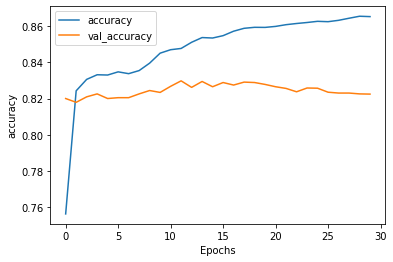

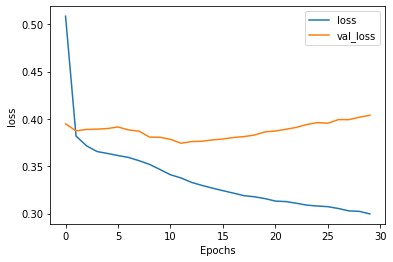

In [61]:
#Plotting our results
import matplotlib.pyplot as plt

#Accuracy 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
  
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

#Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
  
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])
plt.show()

Think about loss in this context, as a confidence in the prediction. So while the number of accurate predictions increased over time, what was interesting was that the confidence per prediction effectively decreased. You may find this happening a lot with text data. So it's very important to keep an eye on it. 

- One way to do this is to explore the differences as you tweak the hyperparameters. So for example, if you consider these changes, a decrease in vocabulary size, and taking shorter sentences, reducing the likelihood of padding, and then rerun, you may see results like this. Here, you can see that the loss has flattened out which looks good, but of course, your accuracy is not as high.

- Another tweak. Changing the number of dimensions using the embedding was also tried. Here, we can see that that had very little difference. Putting the hyperparameters as separate variables like this is a useful programming exercise, making it much easier for you to tweak and explore their impact on training.

In [62]:
#For tensorflow projector Vissulaization of Sentiments in Vector space 

#Reverse key value to take out values
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])


e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


import io
out_v = io.open('sarcasm_vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('sarcasm_meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('sarcasm_vecs.tsv')
  files.download('sarcasm_meta.tsv')

<OOV> scientists <OOV> <OOV> <OOV> of hair loss ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0
(1000, 32)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.12409878]
 [0.5020355 ]]
